/usr/local/lib/python3.12/dist-packages/topsis_prigya_102313061/topsis.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not np.all(values.applymap(np.isreal)):
Process completed. Output saved.

TOPSIS Output:
               Model  Text_Quality  Language_Fluency  Generation_Speed  \
0            GPT-Neo            34                33               140   
1                 T5            36                30               160   
2               BART            35                31               150   
3            FLAN-T5            38                28               155   
4  Mistral Small 3.1            37                29               130   
5              GPT-J            36                30               170   

   Model_Size  TOPSIS_Score  Rank  
0         600      0.649146     2  
1         770      0.558217     5  
2         680      0.634107     3  
3         820      0.582388     4  
4         500      0.915492     1  
5        12

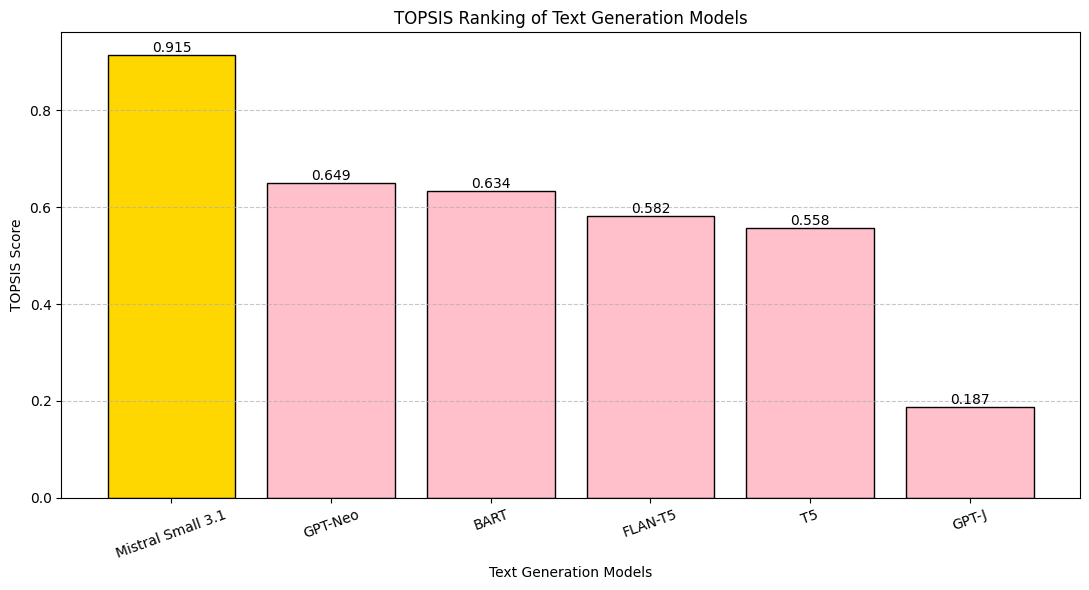

In [4]:
!pip install Topsis-Prigya-102313061

import pandas as pd
import matplotlib.pyplot as plt

# Create input CSV
data = {
    "Model": [
        "GPT-Neo",
        "T5",
        "BART",
        "FLAN-T5",
        "Mistral Small 3.1",
        "GPT-J"
    ],
    "Text_Quality": [34, 36, 35, 38, 37, 36],
    "Language_Fluency": [33, 30, 31, 28, 29, 30],
    "Generation_Speed": [140, 160, 150, 155, 130, 170],
    "Model_Size": [600, 770, 680, 820, 500, 1200]
}

df = pd.DataFrame(data)
df.to_csv("topsis_input.csv", index=False)

# Run CLI TOPSIS
!topsis topsis_input.csv 0.4,0.25,0.2,0.15 +,-,-,- topsis_output.csv

# Read output
result_df = pd.read_csv("topsis_output.csv")

# 🔴 FIX: Rename column
result_df.rename(columns={"Topsis Score": "TOPSIS_Score"}, inplace=True)

print("\nTOPSIS Output:")
print(result_df)

# Visualization
result_df = result_df.sort_values("Rank")

plt.figure(figsize=(11, 6))
colors = ["gold" if rank == 1 else "pink" for rank in result_df["Rank"]]

bars = plt.bar(
    result_df["Model"],
    result_df["TOPSIS_Score"],
    color=colors,
    edgecolor="black"
)

plt.xlabel("Text Generation Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Generation Models")

plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()
